In [5]:
import os

path = '/Users/jorgecamero/MOIRE-FRAUD-DETECTION'
print(os.path.exists(path))

for roots, dirs, files in os.walk(path):
    for file in files:
        if not file.endswith(('.jpg', '.png', '.jpeg', '.zip', '.txt', '.json', '.keras', '.py', '.pyc', '.ipynb', '.gitignore', '.gitattributes')):
            path = os.path.join(roots, file)
            if '.git' not in path:
                print(os.path.join(roots, file))
                #os.remove(os.path.join(roots, file))

True


In [361]:
from utils import get_model

model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)


In [2]:
from utils import load_img, preprocess_img
from predict import predict_img

import os
import random
import matplotlib.pyplot as plt

paths = ['/Users/jorgecamero/MoireDataset/batchTrain/Ataque', '/Users/jorgecamero/MoireDataset/batchTrain/Reales']
path = random.choice(paths)
img_list = [img for img in os.listdir(path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
img_path = os.path.join(path, random.choice(img_list))

path = paths[0]
img_path = 'pass_img'
img_num = 1082
img_path = os.path.join(img_path, min([img for img in os.listdir(img_path) if f'_{img_num}_303' in img], key=len))
print(os.path.abspath(img_path))

img = load_img(img_path)
img_elements = preprocess_img(img)

predict = predict_img(model=model, img=img_elements)
predict_label = 'Real' if predict == 0 else 'Ataque'
print('Prediccion:', predict_label)

plt.imshow(img)
plt.title(os.path.basename(path))
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'pass_img'

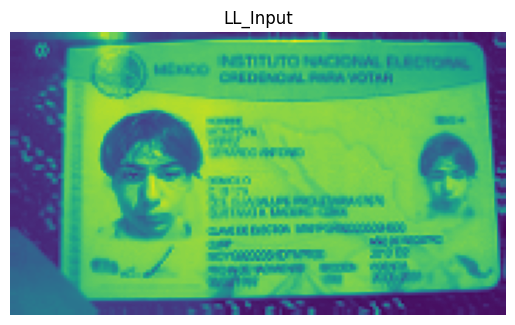

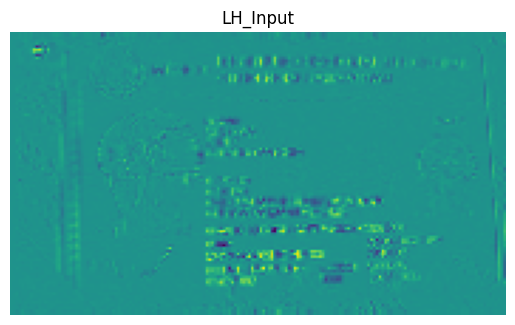

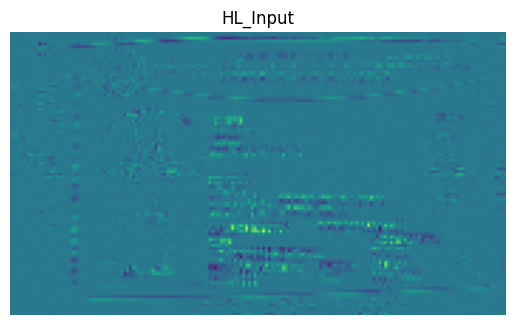

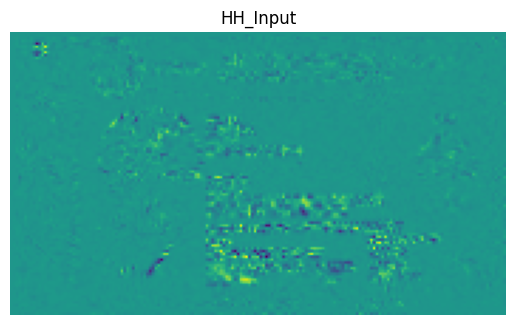

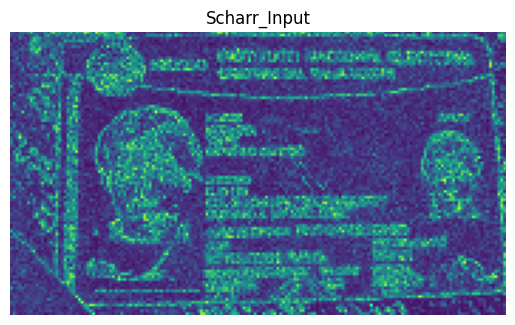

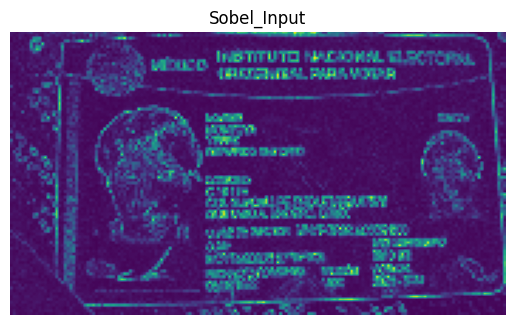

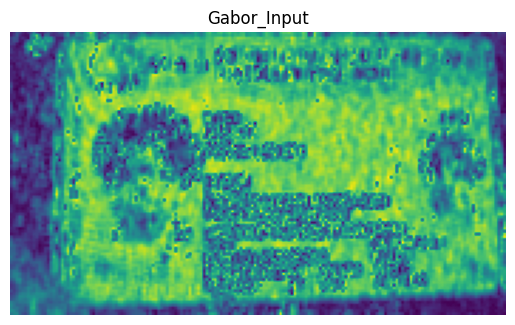

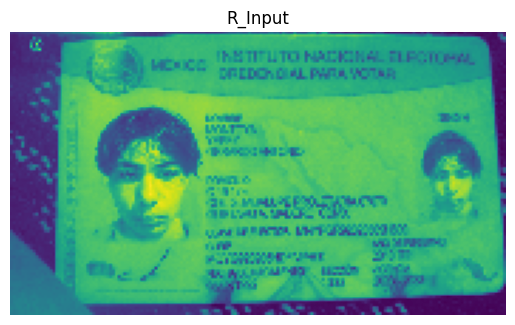

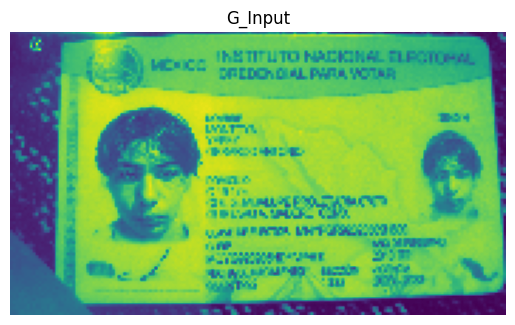

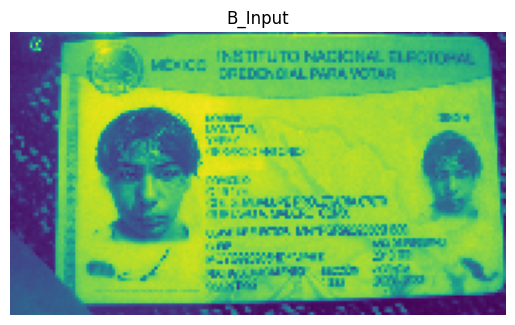

In [267]:
for name, element in img_elements.items():
    plt.imshow(element)
    plt.title(name)
    plt.axis('off')
    plt.show()

In [371]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils import get_model
from predict import predict_img
from read_json import get_scores
from utils import load_img, preprocess_img

HEIGHT = 800
WIDTH = 1400
model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

root = '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301'

folder_list = [folder for folder in os.listdir(root) if os.path.isdir(os.path.join(root, folder))]
for folder in folder_list:
    folder_path = os.path.join(root, folder)
    img_list = [img for img in os.listdir(folder_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
    json_list = [file for file in os.listdir(folder_path) if file.lower().endswith('.json')]
    
    for json, img in zip(json_list, img_list):
        json_path = os.path.join(folder_path, json)
        img_path = os.path.join(folder_path, img)
        
        img_format = load_img(img_path, height=HEIGHT, width=WIDTH)
        img_elements = preprocess_img(img_format)
        prediction = 'PASS' if predict_img(model, img_elements) == 0 else 'FAIL'
        
        json_prediction = get_scores(json_path)['result_result'][0]
        if json_prediction == 'WARNING':
            json_prediction = 'PASS'

        if json_prediction != prediction:
            plt.imshow(img_format)
            plt.axis('off')
            plt.title(f"Model: {prediction}      Json: {json_prediction}")
            plt.pause(2)
            clear_output(wait=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301'

In [1]:
import os

path = 'batch/Ataque'
img_list = [file for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

for idx, file in enumerate(img_list):
    filename = '_'.join(file.split('_')[3::])
    filename = f'{idx}_{filename}'
    print(os.path.join(path, filename))
    os.rename(os.path.join(path, file), os.path.join(path, filename))

FileNotFoundError: [Errno 2] No such file or directory: 'batch/Ataque'

In [2]:
import os
import shutil
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils import load_img

file = '/Users/jorgecamero/MoireDataset/id_android_download/id_android_304_pass_list.txt'
with open(file, 'r') as text_file:
        lines = [line.strip() for line in text_file]
    
outputDir = './pass_img'
if not os.path.exists(outputDir):
    os.mkdir(outputDir)

for idx, filename in enumerate(lines):
    new_filename = os.path.join(outputDir, f'_{idx}_{str(303)}_{os.path.basename(filename)}')
    shutil.copyfile(filename, new_filename)
    # img = load_img(filename, height=HEIGHT, width=WIDTH)
    # plt.imshow(img)
    # plt.axis('off')
    # print(filename)
    # plt.pause(2)
    # clear_output(wait=True)

KeyboardInterrupt: 

In [1]:
import os
import shutil
from IPython.display import clear_output
import matplotlib.pyplot as plt

from utils import get_model
from predict import predict_img
from read_json import get_scores
from utils import load_img, preprocess_img

HEIGHT = 800
WIDTH = 1400
model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

path = '/Users/jorgecamero/MoireDataset/batch/Ataque'
img_list = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

cnt = 0
for idx, img_path in enumerate(img_list):
    img = load_img(img_path, width=175, height=100)
    #img_elements = preprocess_img(img)
    prediction_bin, prediction = predict_img(model, img)
    
    if not prediction_bin:
        filename = os.path.basename(img_path)
        #output_path = os.path.join(outputDir, filename)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
        print(prediction)
        plt.draw()
        plt.pause(0.5)
        clear_output(wait=True)
        #shutil.move(img_path, output_path)
    else:
        cnt += 1
        print(f'Contador de aciertos: {cnt}/{len(img_list)}', end='\r')
        
print(f"Porcentaje de aciertos: {cnt}/{len(img_list)} - {round(cnt/len(img_list), 2)*100}%")

Porcentaje de aciertos: 482/482 - 100.0%


In [9]:
import os
import random
import matplotlib.pyplot as plt

from utils import get_model
from predict import predict_img
from utils import load_img

HEIGHT = 100
WIDTH = 175
model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)



Ataque
0.9998318


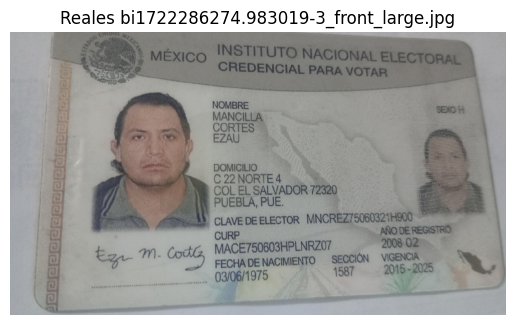

In [42]:
path = '/Users/jorgecamero/MoireDataset/batchTrain'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
prediction_bin, prediction = predict_img(model, img)
prediction_label = 'Ataque' if prediction_bin == 1 else 'Real'

plt.imshow(load_img(random_img, width=1400, height=800))
plt.title(f'{os.path.basename(random_folder)} {os.path.basename(random_img)}')
plt.axis('off')
print(prediction_label)
print(prediction)